In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Import Libraries

In [2]:
df = pd.read_csv('house_prices_canada_simulated.csv')
df.head()

,City,Province,Size_sqft,Bedrooms,Bathrooms,Year_Built,Amenities_Score,Crime_Rate,Median_Income,Distance_to_City_Center_km,House_Price
0,Halifax,ON,2170,2,2,1970,1.62,7.19,138499,23.97,554763.39
1,Ottawa,MB,3160,4,1,1970,7.87,3.18,42187,28.25,858586.77
2,Winnipeg,ON,1919,3,1,1959,4.67,9.20,117243,3.13,516688.68
3,Edmonton,ON,3991,2,3,2007,7.83,8.54,75098,9.62,1055658.48
4,Halifax,MB,3565,3,3,1988,9.13,7.38,132471,36.67,1012863.12


LOAD DATASET

In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        500 non-null    object 
 1   Province                    500 non-null    object 
 2   Size_sqft                   500 non-null    int64  
 3   Bedrooms                    500 non-null    int64  
 4   Bathrooms                   500 non-null    int64  
 5   Year_Built                  500 non-null    int64  
 6   Amenities_Score             500 non-null    float64
 7   Crime_Rate                  500 non-null    float64
 8   Median_Income               500 non-null    int64  
 9   Distance_to_City_Center_km  500 non-null    float64
 10  House_Price                 500 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 43.1+ KB
None
         Size_sqft    Bedrooms   Bathrooms   Year_Built  Amenities_Score  \
count   50

INVESTIGATE DATASET

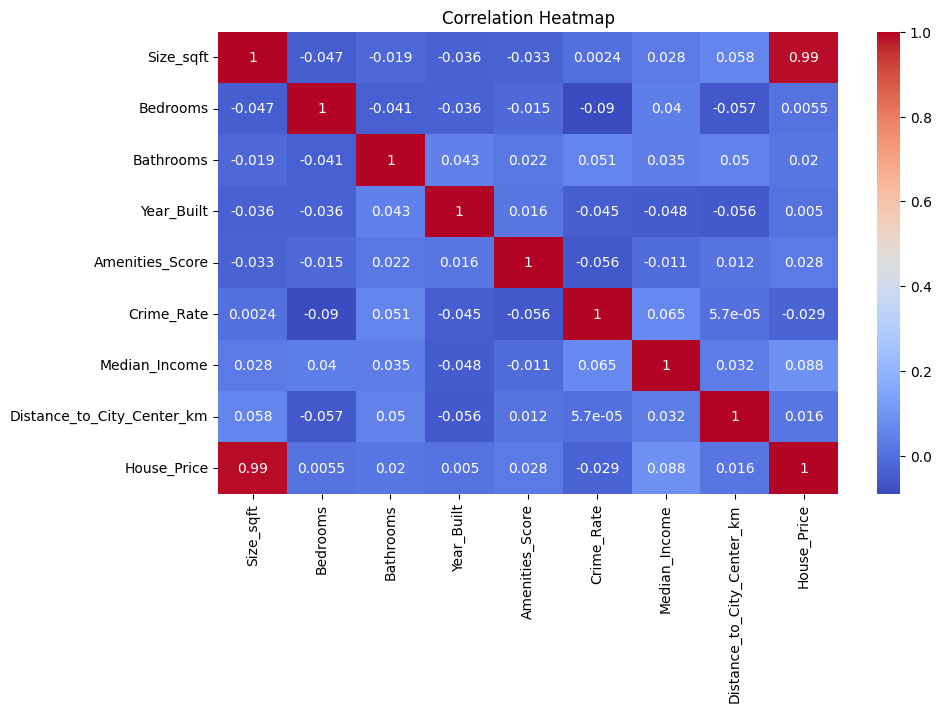

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 Visualize Correlation

In [7]:
os.makedirs("graphs", exist_ok=True)
features = ['Size_sqft', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Amenities_Score', 'Crime_Rate', 'Median_Income', 'Distance_to_City_Center_km']

for col in features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[col], y=df['House_Price'], hue=df['City'], alpha=0.7)
    plt.title(f'House Price vs {col}')
    plt.savefig(f'graphs/house_price_vs_{col}.png')
    plt.close()


Feature vs House Price Graphs

In [8]:
X = df.drop('House_Price', axis=1)
y = df['House_Price']

Prepare Features and Target

In [9]:
categorical = ['City', 'Province']
numerical = [col for col in X.columns if col not in categorical]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

Preprocessing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train/Test Split

In [11]:
models = {
    'Linear Regression': Pipeline([('prep', preprocessor), ('model', LinearRegression())]),
    'Random Forest': Pipeline([('prep', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42))])
}

results = {}
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

Build and Train Models

In [13]:
pd.DataFrame(results).T

,RMSE,MAE,R2
Linear Regression,24435.377143,19607.895488,0.990579
Random Forest,34978.017071,27847.987481,0.980696


from matplotlib import pyplot as plt
_df_0['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MAE', y='R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['R2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('R2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RMSE'}, axis=1)
              .sort_values('RMSE', ascending=True))
  xs = counted['RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MAE']
  ys = series['R2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('MAE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE')
_ = plt.ylabel('R2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MAE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MAE'}, axis=1)
              .sort_values('MAE', ascending=True))
  xs = counted['MAE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('MAE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

Model Evaluation

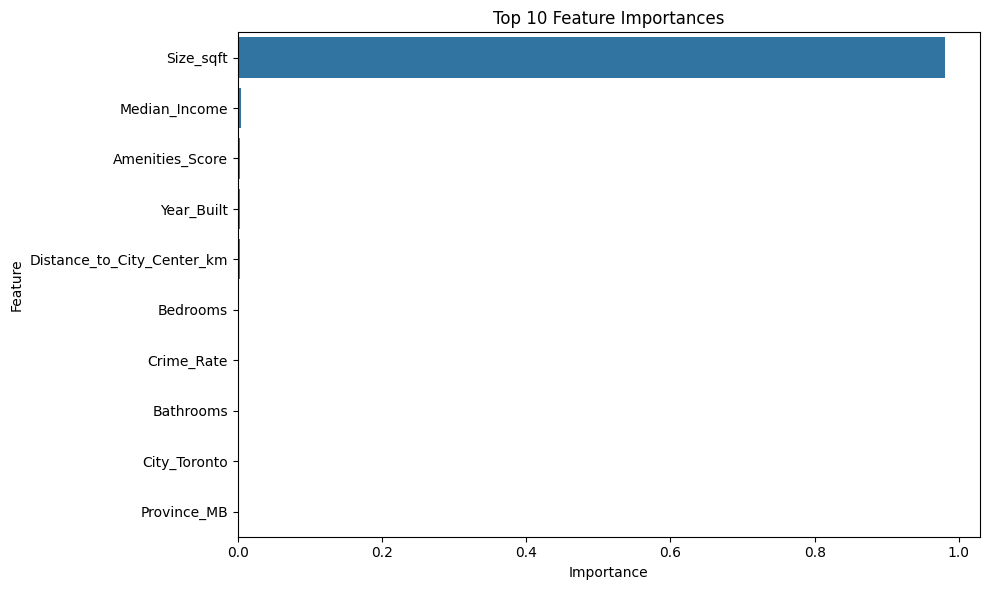

In [14]:
rf = models['Random Forest'].named_steps['model']
ohe = models['Random Forest'].named_steps['prep'].transformers_[1][1]
cat_feats = ohe.get_feature_names_out(categorical)
features_all = numerical + list(cat_feats)

importances = rf.feature_importances_
imp_df = pd.DataFrame({'Feature': features_all, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=imp_df.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.savefig('graphs/feature_importance.png')
plt.show()

Feature Importance (Random Forest)

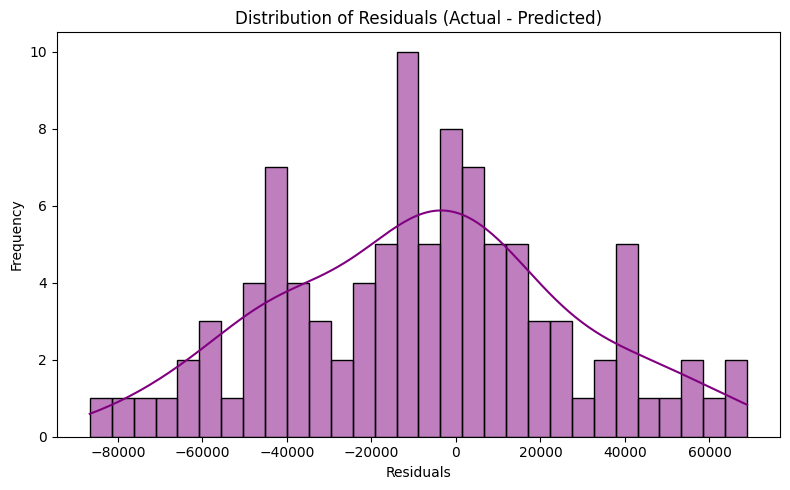

In [24]:
# Residual Analysis for Random Forest Model
best_model = models['Random Forest']
y_pred_rf = best_model.predict(X_test)

residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Distribution of Residuals (Actual - Predicted)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('graphs/residual_distribution.png')
plt.show()




Residual Analysis for Random Forest Model

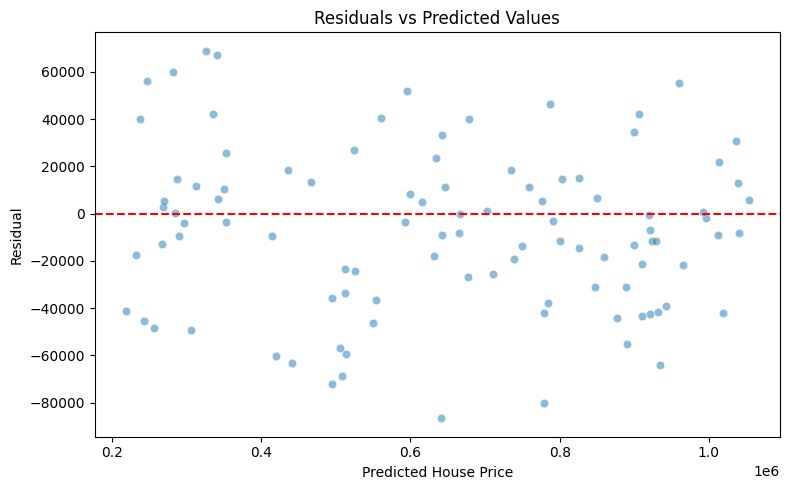

In [23]:
# Residuals vs Predicted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_rf, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted House Price")
plt.ylabel("Residual")
plt.tight_layout()
plt.savefig('graphs/residuals_vs_predicted.png')
plt.show()

Residuals vs Predicted Plot

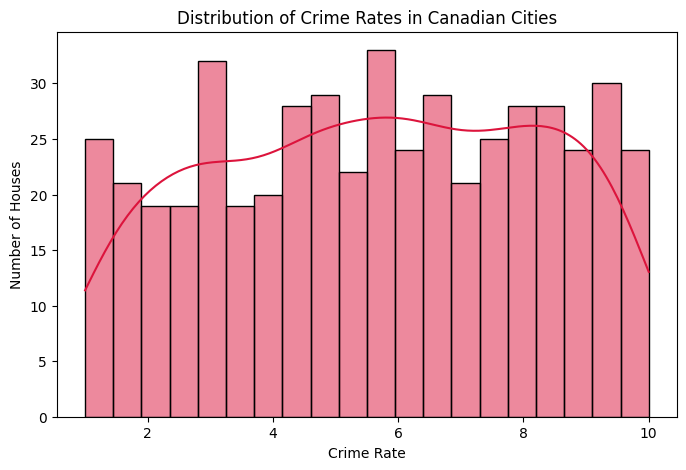

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Crime_Rate'], bins=20, kde=True, color='crimson')
plt.title("Distribution of Crime Rates in Canadian Cities")
plt.xlabel("Crime Rate")
plt.ylabel("Number of Houses")
plt.show()


Residual Analysis for Random Forest Model

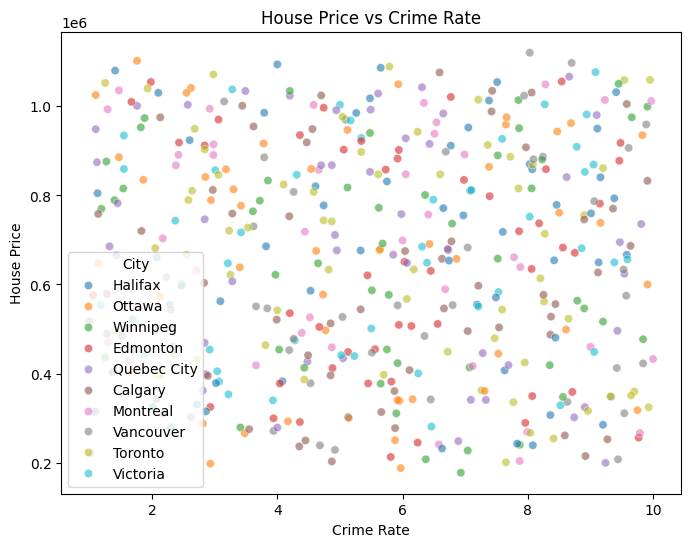

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Crime_Rate', y='House_Price', hue='City', alpha=0.6)
plt.title("House Price vs Crime Rate")
plt.xlabel("Crime Rate")
plt.ylabel("House Price")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


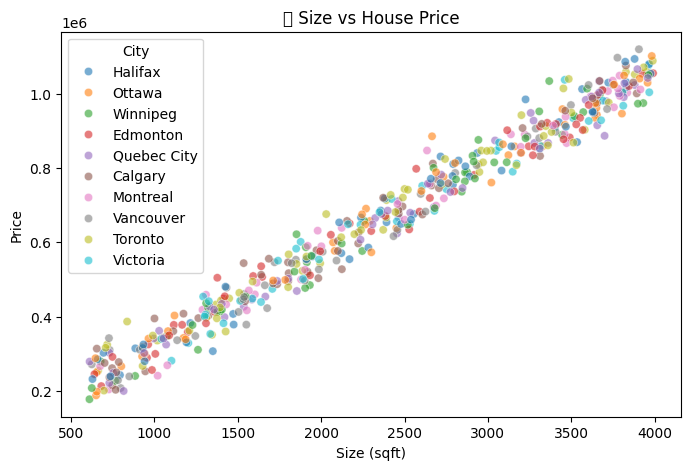

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Size_sqft', y='House_Price', hue='City', alpha=0.6)
plt.title("🏡 Size vs House Price")
plt.xlabel("Size (sqft)")
plt.ylabel("Price")
plt.show()


House Size vs Price – Bigger houses cost more

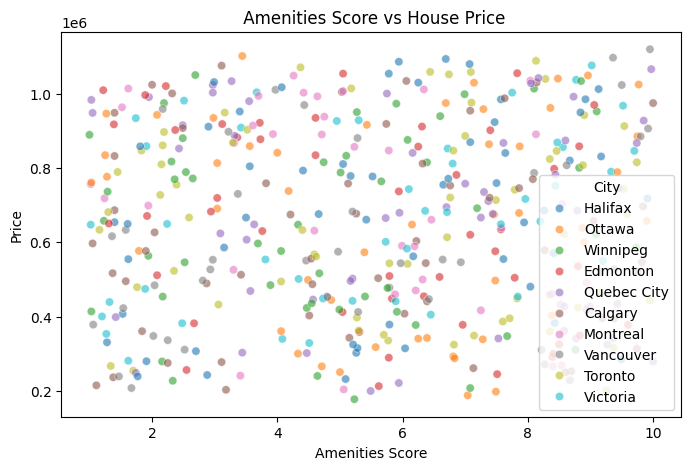

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Amenities_Score', y='House_Price', hue='City', alpha=0.6)
plt.title(" Amenities Score vs House Price")
plt.xlabel("Amenities Score")
plt.ylabel("Price")
plt.show()


 Amenities Score vs Price – More amenities = higher price

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


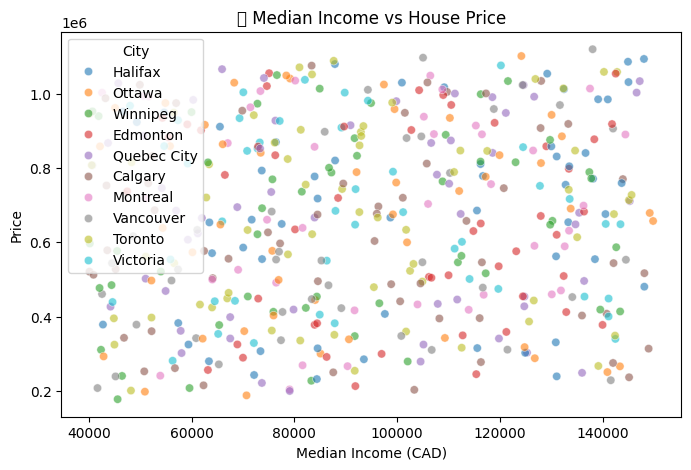

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Median_Income', y='House_Price', hue='City', alpha=0.6)
plt.title(" Median Income vs House Price")
plt.xlabel("Median Income (CAD)")
plt.ylabel("Price")
plt.show()


 Median Income vs Price – Richer neighborhoods have higher prices

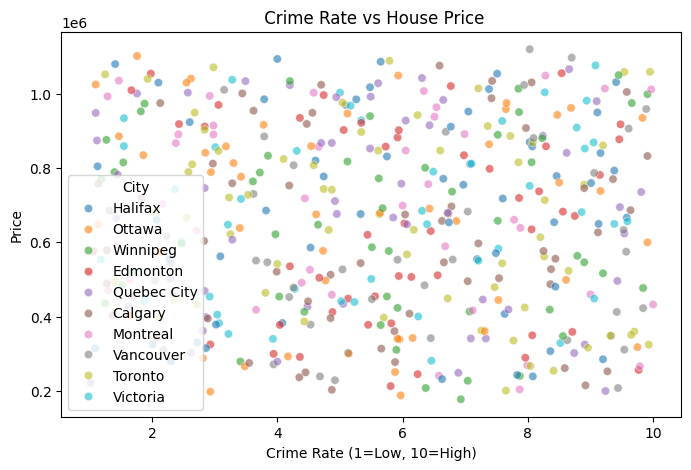

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Crime_Rate', y='House_Price', hue='City', alpha=0.6)
plt.title(" Crime Rate vs House Price")
plt.xlabel("Crime Rate (1=Low, 10=High)")
plt.ylabel("Price")
plt.show()


Crime Rate vs Price – High crime usually means lower price

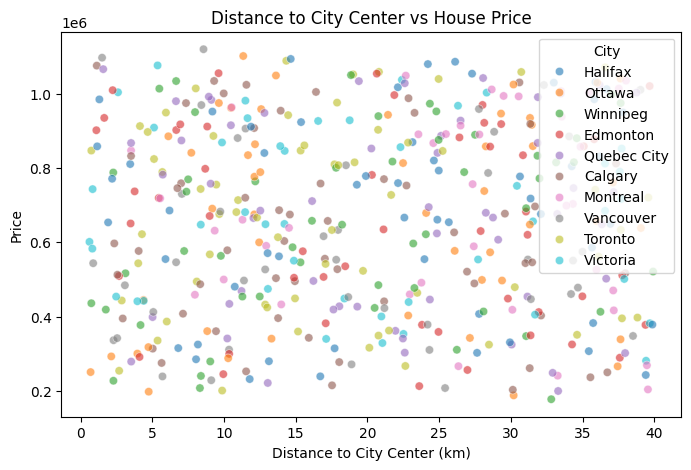

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Distance_to_City_Center_km', y='House_Price', hue='City', alpha=0.6)
plt.title("Distance to City Center vs House Price")
plt.xlabel("Distance to City Center (km)")
plt.ylabel("Price")
plt.show()


Distance to City Center vs Price – Closer to city = higher price

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20]
}

rf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'model__max_depth': None, 'model__n_estimators': 150}


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])


param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}


grid_search = GridSearchCV(estimator=rf_pipeline,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best Parameters Found:")
print(grid_search.best_params_)


best_rf_model = grid_search.best_estimator_


y_pred = best_rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")


Best Parameters Found:
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 150}
Test RMSE: 34734.62
Test R²: 0.98


In [31]:

df['Price_per_sqft'] = df['House_Price'] / df['Size_sqft']

print(df[['House_Price', 'Size_sqft', 'Price_per_sqft']].head())


   House_Price  Size_sqft  Price_per_sqft
0    554763.39       2170      255.651332
1    858586.77       3160      271.704674
2    516688.68       1919      269.248921
3   1055658.48       3991      264.509767
4   1012863.12       3565      284.113077
